In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("/content/ElectricCarData_Norm.csv")
df

,Brand,Model,Accel,TopSpeed,Range,Efficiency,FastCharge,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
0,Tesla,Model 3 Long Range Dual Motor,4.6 sec,233 km/h,450 km,161 Wh/km,940 km/h,Rapid charging possible,All Wheel Drive,Type 2 CCS,Sedan,D,5,55480
1,Volkswagen,ID.3 Pure,10.0 sec,160 km/h,270 km,167 Wh/km,250 km/h,Rapid charging possible,Rear Wheel Drive,Type 2 CCS,Hatchback,C,5,30000
2,Polestar,2,4.7 sec,210 km/h,400 km,181 Wh/km,620 km/h,Rapid charging possible,All Wheel Drive,Type 2 CCS,Liftback,D,5,56440
3,BMW,iX3,6.8 sec,180 km/h,360 km,206 Wh/km,560 km/h,Rapid charging possible,Rear Wheel Drive,Type 2 CCS,SUV,D,5,68040
4,Honda,e,9.5 sec,145 km/h,170 km,168 Wh/km,190 km/h,Rapid charging possible,Rear Wheel Drive,Type 2 CCS,Hatchback,B,4,32997
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,Nissan,Ariya 63kWh,7.5 sec,160 km/h,330 km,191 Wh/km,440 km/h,Rapid charging possible,Front Wheel Drive,Type 2 CCS,Hatchback,C,5,45000
99,Audi,e-tron S Sportback 55 quattro,4.5 sec,210 km/h,335 km,258 Wh/km,540 km/h,Rapid charging possible,All Wheel Drive,Type 2 CCS,SUV,E,5,96050
100,Nissan,Ariya e-4ORCE 63kWh,5.9 sec,200 km/h,325 km,194 Wh/km,440 km/h,Rapid charging possible,All Wheel Drive,Type 2 CCS,Hatchback,C,5,50000
101,Nissan,Ariya e-4ORCE 87kWh Performance,5.1 sec,200 km/h,375 km,232 Wh/km,450 km/h,Rapid charging possible,All Wheel Drive,Type 2 CCS,Hatchback,C,5,65000


In [5]:
df.shape

(103, 14)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Brand        103 non-null    object
 1   Model        103 non-null    object
 2   Accel        103 non-null    object
 3   TopSpeed     103 non-null    object
 4   Range        103 non-null    object
 5   Efficiency   103 non-null    object
 6   FastCharge   103 non-null    object
 7   RapidCharge  103 non-null    object
 8   PowerTrain   103 non-null    object
 9   PlugType     103 non-null    object
 10  BodyStyle    103 non-null    object
 11  Segment      103 non-null    object
 12  Seats        103 non-null    int64 
 13  PriceEuro    103 non-null    int64 
dtypes: int64(2), object(12)
memory usage: 11.4+ KB


In [7]:
df.isnull().sum()

Brand          0
Model          0
Accel          0
TopSpeed       0
Range          0
Efficiency     0
FastCharge     0
RapidCharge    0
PowerTrain     0
PlugType       0
BodyStyle      0
Segment        0
Seats          0
PriceEuro      0
dtype: int64

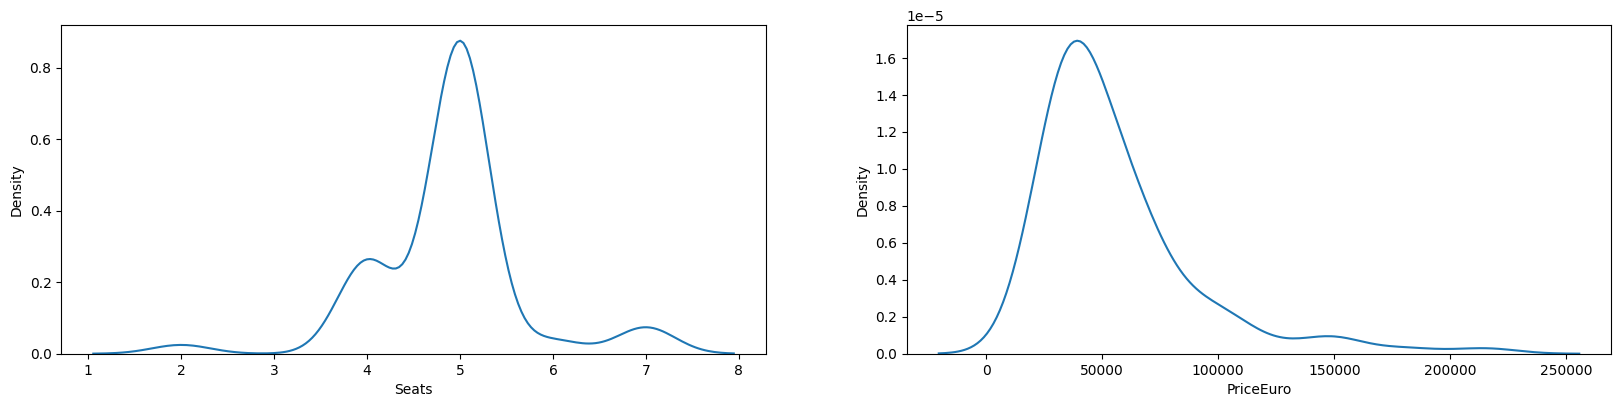

In [8]:
plt.figure(figsize=(20,35))
num_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

for i, col in enumerate(num_cols):
    ax = plt.subplot(7, 2, i+1)
    sns.kdeplot(df[col], ax=ax)
    plt.xlabel(col)


plt.show()

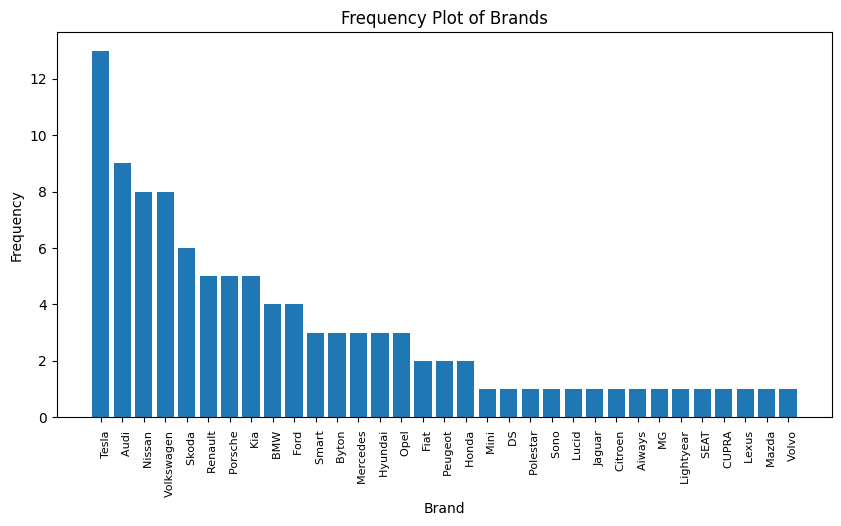

In [9]:
plt.figure(figsize=(10,5))
plt.bar(df['Brand'].value_counts().index, df['Brand'].value_counts().values)
plt.xlabel('Brand')
plt.ylabel('Frequency')
plt.title('Frequency Plot of Brands')
plt.xticks(rotation=90, ha='left', fontsize=8)
plt.show()

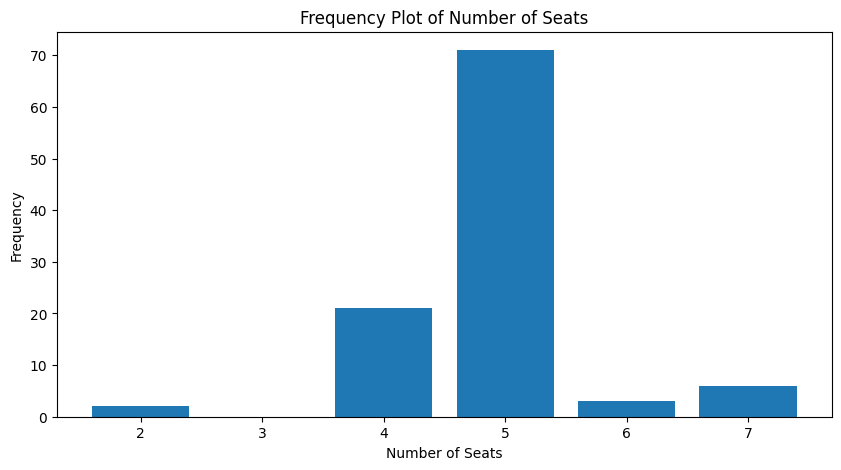

In [10]:
plt.figure(figsize=(10,5))
plt.bar(df['Seats'].value_counts().index, df['Seats'].value_counts().values)
plt.xlabel('Number of Seats')
plt.ylabel('Frequency')
plt.title('Frequency Plot of Number of Seats')
plt.show()

In [11]:
df.isnull().sum()

Brand          0
Model          0
Accel          0
TopSpeed       0
Range          0
Efficiency     0
FastCharge     0
RapidCharge    0
PowerTrain     0
PlugType       0
BodyStyle      0
Segment        0
Seats          0
PriceEuro      0
dtype: int64

In [12]:
df[['FastCharge','TopSpeed','Range','Efficiency','Accel']] = df[['FastCharge','TopSpeed','Range','Efficiency','Accel']].replace(to_replace=r'([a-z/]+|[A-Z/]+)', value='', regex=True)

In [13]:

df['FastCharge']=df['FastCharge'].str.replace('-','0')
df['FastCharge']=df['FastCharge'].astype(float)
df['FastCharge'].mean()

434.56310679611653

In [14]:
df['FastCharge']=df['FastCharge'].replace(0,434.56)

In [15]:
df1=df.drop(['Brand','Model'],axis=1)
df1.head()

,Accel,TopSpeed,Range,Efficiency,FastCharge,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
0,4.6,233,450,161,940.0,Rapid charging possible,All Wheel Drive,Type 2 CCS,Sedan,D,5,55480
1,10.0,160,270,167,250.0,Rapid charging possible,Rear Wheel Drive,Type 2 CCS,Hatchback,C,5,30000
2,4.7,210,400,181,620.0,Rapid charging possible,All Wheel Drive,Type 2 CCS,Liftback,D,5,56440
3,6.8,180,360,206,560.0,Rapid charging possible,Rear Wheel Drive,Type 2 CCS,SUV,D,5,68040
4,9.5,145,170,168,190.0,Rapid charging possible,Rear Wheel Drive,Type 2 CCS,Hatchback,B,4,32997


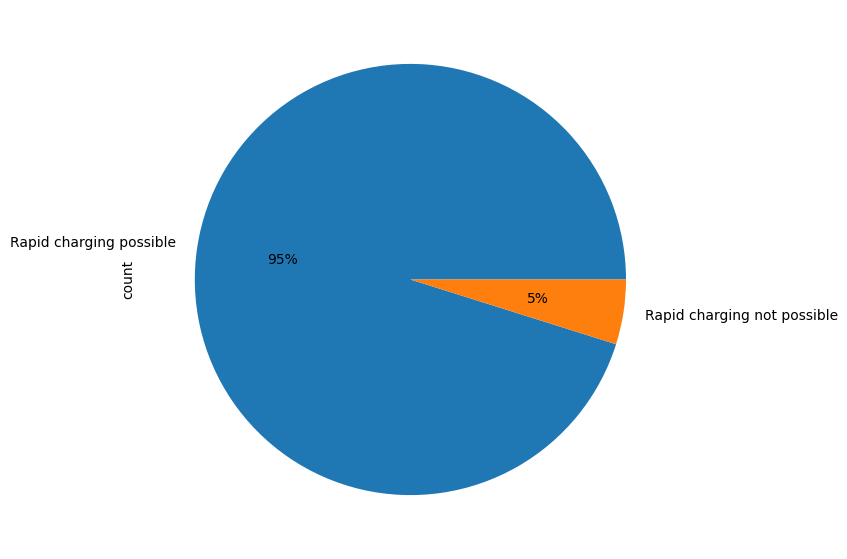

In [16]:
plt.figure(figsize=[9,7])
df1['RapidCharge'].value_counts().plot.pie(autopct='%.0f%%')
plt.show()

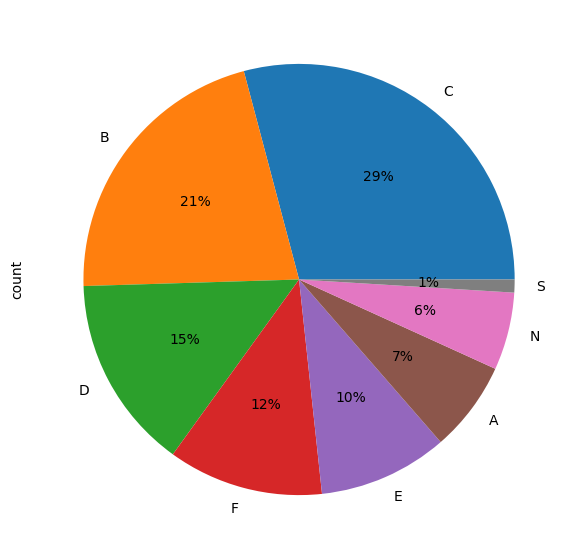

In [17]:
plt.figure(figsize=[9,7])
df1['Segment'].value_counts().plot.pie(autopct='%.0f%%')
plt.show()


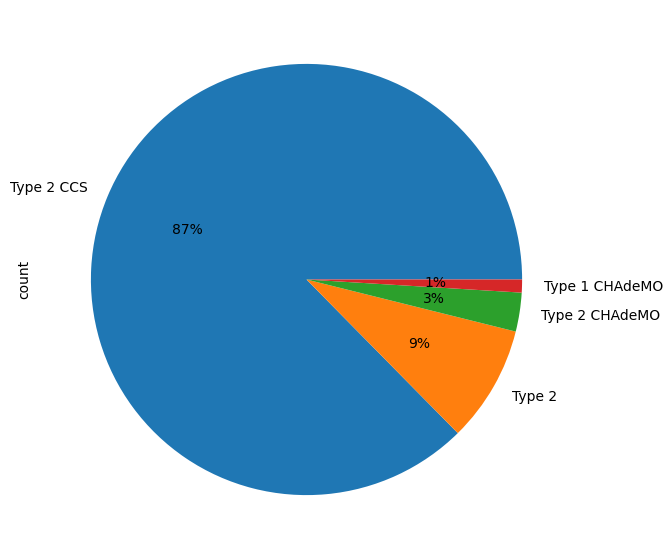

In [18]:
plt.figure(figsize=[9,7])
df1['PlugType'].value_counts().plot.pie(autopct='%.0f%%')
plt.show()

In [19]:
df1['TopSpeed'] = df1['TopSpeed'].astype(int)
df1['Range'] = df1['Range'].astype(int)
df1['Efficiency'] = df1['Efficiency'].astype(int)
df1['Accel'] = df1['Accel'].astype(float)

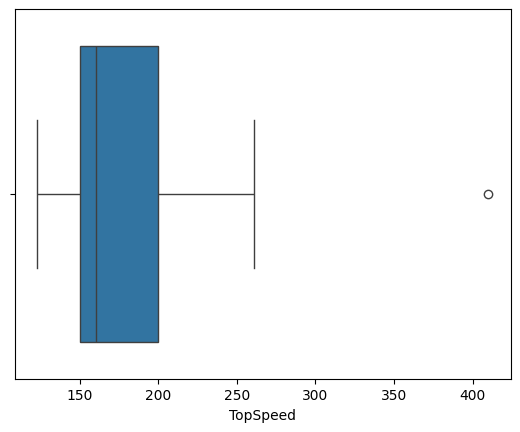

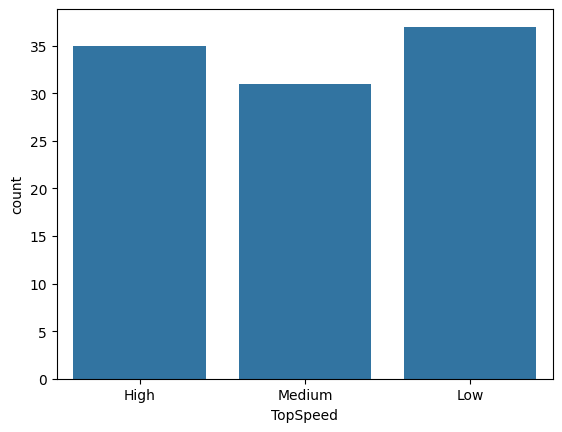

In [20]:
sns.boxplot(x=df1['TopSpeed'])
plt.show()
def convert(x):
     if x<160:
       return "Low"
     elif x>=160 and x<190:
       return "Medium"
     else:
       return "High"
converted_TopSpeed=df1['TopSpeed'].apply(convert)
sns.countplot(x=converted_TopSpeed)
plt.show()

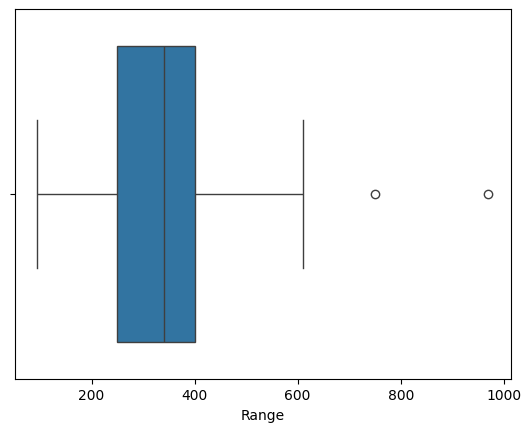

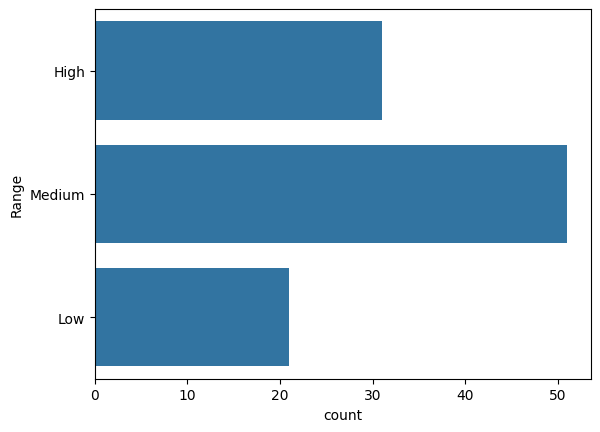

In [21]:
sns.boxplot(x=df1['Range'])
plt.show()
def convert1(x):
     if x<250:
       return "Low"
     elif x>=250 and x<400:
       return "Medium"
     else:
       return "High"
converted_Range=df1['Range'].apply(convert1)
sns.countplot(converted_Range)
plt.show()

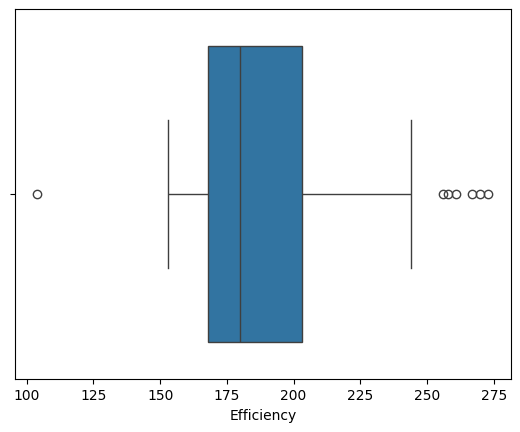

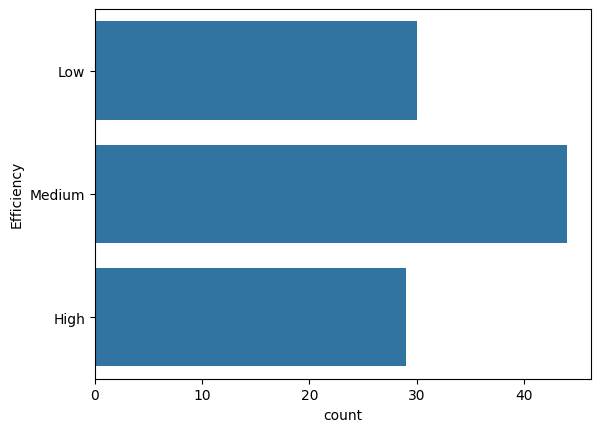

In [22]:
sns.boxplot(x=df1['Efficiency'])
plt.show()
def convert2(x):
     if x<170:
       return "Low"
     elif x>=170 and x<200:
       return "Medium"
     else:
       return "High"
converted_Eff=df1['Efficiency'].apply(convert2)
sns.countplot(converted_Eff)
plt.show()

In [23]:
df1 = df1.drop(columns=['RapidCharge','PlugType'])


In [24]:
from sklearn.preprocessing import OrdinalEncoder
oe1=OrdinalEncoder(categories=[['AWD', 'RWD', 'FWD']])
oe2=OrdinalEncoder(categories=[['Sedan', 'Hatchback', 'Liftback', 'SUV', 'Pickup', 'MPV', 'Cabrio','SPV', 'Station']])
oe3=OrdinalEncoder(categories=[['D', 'C', 'B', 'F', 'A', 'E', 'N', 'S']])
df1 = pd.get_dummies(df1)

In [25]:
df1=df1.astype(float)
cols_to_norm = ['Accel', 'TopSpeed', 'Range', 'Efficiency', 'FastCharge', 'PriceEuro']

# Normalize specified columns
for col in cols_to_norm:
    col_min = df1[col].min()
    col_max = df1[col].max()
    df1[col] = (df1[col] - col_min) / (col_max - col_min)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Text(0, 0.5, 'evs')

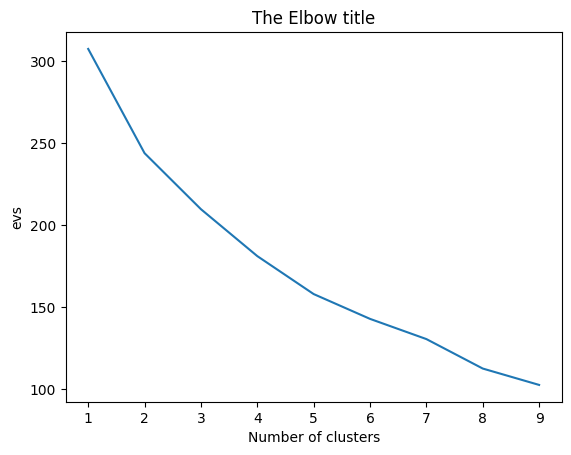

In [26]:
from sklearn.cluster import KMeans
evs=[]
for i in range(1,10):
    kmeans = KMeans(i)
    kmeans.fit(df1)
    evs_iter = kmeans.inertia_
    evs.append(evs_iter)

number_clusters = range(1,10)
plt.plot(number_clusters,evs)
plt.title('The Elbow title')
plt.xlabel('Number of clusters')
plt.ylabel('evs')

In [27]:
kmeanModel = KMeans(n_clusters=5)
kmeanModel.fit(df1)

identified_clusters = kmeanModel.fit_predict(df1)
identified_clusters

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([4, 1, 4, 0, 2, 4, 1, 3, 4, 0, 0, 1, 3, 4, 1, 2, 4, 2, 3, 2, 3, 0,
       1, 4, 4, 1, 1, 0, 2, 3, 0, 1, 3, 0, 1, 1, 1, 2, 3, 0, 4, 3, 0, 2,
       2, 3, 3, 4, 4, 1, 0, 4, 3, 1, 0, 2, 3, 2, 1, 4, 3, 0, 1, 0, 0, 4,
       3, 0, 3, 0, 2, 0, 4, 0, 1, 1, 0, 2, 0, 4, 1, 0, 2, 0, 3, 2, 0, 0,
       0, 1, 0, 2, 3, 1, 3, 1, 3, 0, 1, 0, 1, 1, 0], dtype=int32)

In [29]:
df_prev=df1.copy()
data_with_clusters = df_prev.copy()
data_with_clusters['Clusters'] = identified_clusters
data_with_clusters

,Accel,TopSpeed,Range,Efficiency,FastCharge,Seats,PriceEuro,PowerTrain_All Wheel Drive,PowerTrain_Front Wheel Drive,PowerTrain_Rear Wheel Drive,...,BodyStyle_Station,Segment_A,Segment_B,Segment_C,Segment_D,Segment_E,Segment_F,Segment_N,Segment_S,Clusters
0,0.123153,0.383275,0.405714,0.337278,1.000000,5.0,0.181407,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,4
1,0.389163,0.128920,0.200000,0.372781,0.103896,5.0,0.050654,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1
2,0.128079,0.303136,0.348571,0.455621,0.584416,5.0,0.186334,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,4
3,0.231527,0.198606,0.302857,0.603550,0.506494,5.0,0.245860,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0
4,0.364532,0.076655,0.085714,0.378698,0.025974,4.0,0.066033,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,0.266010,0.128920,0.268571,0.514793,0.350649,5.0,0.127628,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1
99,0.118227,0.303136,0.274286,0.911243,0.480519,5.0,0.389596,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0
100,0.187192,0.268293,0.262857,0.532544,0.350649,5.0,0.153286,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1
101,0.147783,0.268293,0.320000,0.757396,0.363636,5.0,0.230260,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1


In [30]:
data_with_clusters['Clusters'].value_counts()

Clusters
0    29
1    24
3    19
4    16
2    15
Name: count, dtype: int64

In [31]:
Segment_wise_mean=data_with_clusters[['Accel','TopSpeed','Range','Efficiency','FastCharge','PriceEuro','Clusters','Seats']].groupby('Clusters').mean()
Segment_wise_mean

,Accel,TopSpeed,Range,Efficiency,FastCharge,PriceEuro,Seats
Clusters,,,,,,,
0,0.174622,0.252433,0.341675,0.671496,0.472906,0.232410,5.379310
1,0.300903,0.135889,0.248095,0.448471,0.259740,0.100281,5.000000
2,0.382594,0.067364,0.128381,0.379882,0.204177,0.054018,3.733333
3,0.385533,0.086008,0.209323,0.441296,0.180079,0.083717,5.157895
4,0.095135,0.433798,0.433214,0.474112,0.736201,0.457041,4.562500
